рівень 1


In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import timeit as ti
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Завантаження датасету і створення файлу csv

In [2]:
individual_household_electric_power_consumption = fetch_ucirepo(id=235)
X = individual_household_electric_power_consumption.data.features
X_df = pd.DataFrame(X)
X_df.to_csv('Individual_household_electric_power_consumption.csv', index=False)
print(X_df) 

c:\Users\asont\anaconda3\envs\lab4\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


               Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.40

Записуємо датасет у змінні та видаляємо зниклі данні

In [3]:
data_df = pd.read_csv('Individual_household_electric_power_consumption.csv', na_values='?')
for column in data_df.columns[2:-1]:
    data_df[column] = pd.to_numeric(data_df[column], errors = 'coerce')
data_df = data_df.dropna()

data_np = np.array(X)

def remove_rows(npy):
    mask = np.any(npy == '?', axis=1)
    return npy[~mask]

data_np = remove_rows(data_np)

data_np[:, 2:8] = data_np[:, 2:8].astype(float)

print(data_df)
print(data_np)


               Date      Time  Global_active_power  Global_reactive_power  \
0        16/12/2006  17:24:00                4.216                  0.418   
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
4        16/12/2006  17:28:00                3.666                  0.528   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:00                0.944                  0.000   
2075256  26/11/2010  21:00:00                0.938                  0.000   
2075257  26/11/2010  21:01:00                0.934                  0.000   
2075258  26/11/2010  21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0    

1. Обрати всі домогосподарства, у яких загальна активна споживана
потужність перевищує 5 кВт.

In [4]:
def t1_np(data):
    data_np[:, 2] = data_np[:, 2]
    return data[data[:, 2] > 5]

def t1_df(data):
    return data[data['Global_active_power'] > 5]


print('numpy:', t1_np(data_np))
print('Час виконання:', ti.timeit(lambda: t1_np(data_np), number = 1))
print('DataFrame:', t1_df(data_df))
print('Час виконання:', ti.timeit(lambda: t1_df(data_df), number = 1))



numpy: [['16/12/2006' '17:25:00' 5.36 ... 0.0 1.0 16.0]
 ['16/12/2006' '17:26:00' 5.374 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:27:00' 5.388 ... 0.0 1.0 17.0]
 ...
 ['24/11/2010' '07:50:00' 5.172 ... 0.0 38.0 17.0]
 ['24/11/2010' '07:51:00' 5.75 ... 0.0 39.0 17.0]
 ['25/11/2010' '07:21:00' 5.074 ... 1.0 2.0 18.0]]
Час виконання: 0.08193570000003092
DataFrame:                Date      Time  Global_active_power  Global_reactive_power  \
1        16/12/2006  17:25:00                5.360                  0.436   
2        16/12/2006  17:26:00                5.374                  0.498   
3        16/12/2006  17:27:00                5.388                  0.502   
11       16/12/2006  17:35:00                5.412                  0.470   
12       16/12/2006  17:36:00                5.224                  0.478   
...             ...       ...                  ...                    ...   
2069356  22/11/2010  18:40:00                5.408                  0.150   
2069357  22/11/2010  18:4

2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [5]:
def t2_np(data):
    return data[data[:, 4] > 235]

def t2_df(data):
    return data[data['Voltage'] > 235]

print('Numpy: ', t2_np(data_np))
print('Час виконання:', ti.timeit(lambda: t2_np(data_np), number = 1))
print('DataFrame: ', t2_df(data_df))
print('Час виконання:', ti.timeit(lambda: t2_df(data_df), number = 1))

Numpy:  [['16/12/2006' '17:28:00' 3.666 ... 0.0 1.0 17.0]
 ['16/12/2006' '17:29:00' 3.52 ... 0.0 2.0 17.0]
 ['16/12/2006' '17:30:00' 3.702 ... 0.0 1.0 17.0]
 ...
 ['26/11/2010' '21:00:00' 0.938 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:01:00' 0.934 ... 0.0 0.0 0.0]
 ['26/11/2010' '21:02:00' 0.932 ... 0.0 0.0 0.0]]
Час виконання: 0.22157299999526003
DataFrame:                 Date      Time  Global_active_power  Global_reactive_power  \
4        16/12/2006  17:28:00                3.666                  0.528   
5        16/12/2006  17:29:00                3.520                  0.522   
6        16/12/2006  17:30:00                3.702                  0.520   
7        16/12/2006  17:31:00                3.700                  0.520   
14       16/12/2006  17:38:00                4.054                  0.422   
...             ...       ...                  ...                    ...   
2075254  26/11/2010  20:58:00                0.946                  0.000   
2075255  26/11/2010  20:59:

3. Обрати всі домогосподарства, у яких сила струму лежить в межах
19-20 А, для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.


In [6]:
def t3_np(data):
    return data[(data[:, 5] >= 19) &
                (data[:, 5] <= 20) &
                (data[:, 7] > data[:, 8])]

def t3_df(data):
    return data[(data['Global_intensity'] >=19) &
                (data['Global_intensity'] >=20) &
                (data['Sub_metering_2'] > data['Sub_metering_3'])]

print('Numpy: ', t3_np(data_np))
print('Час виконання:', ti.timeit(lambda: t3_np(data_np), number = 1))
print('DataFrame: ', t3_df(data_df))
print('Час виконання:', ti.timeit(lambda: t3_df(data_df), number = 1))

Numpy:  [['16/12/2006' '18:09:00' 4.464 ... 0.0 37.0 16.0]
 ['17/12/2006' '01:04:00' 4.582 ... 0.0 13.0 0.0]
 ['17/12/2006' '01:08:00' 4.618 ... 0.0 27.0 0.0]
 ...
 ['24/11/2010' '07:55:00' 4.602 ... 0.0 40.0 17.0]
 ['24/11/2010' '07:56:00' 4.536 ... 0.0 39.0 17.0]
 ['24/11/2010' '07:57:00' 4.626 ... 0.0 39.0 17.0]]
Час виконання: 0.15909480000118492
DataFrame:                 Date      Time  Global_active_power  Global_reactive_power  \
40       16/12/2006  18:04:00                4.928                  0.202   
41       16/12/2006  18:05:00                6.052                  0.192   
42       16/12/2006  18:06:00                6.752                  0.186   
43       16/12/2006  18:07:00                6.474                  0.144   
44       16/12/2006  18:08:00                6.308                  0.116   
...             ...       ...                  ...                    ...   
2068855  22/11/2010  10:19:00                4.908                  0.000   
2071584  24/11/2010

4. Обрати випадковим чином 500000 домогосподарств (без повторів
елементів вибірки), для них обчислити середні величини усіх 3-х
груп споживання електричної енергії

In [7]:
def t4_np(data):
    random_indicies = np.random.choice(data.shape[0], size=500000, replace=False)
    random_sample_np = data[random_indicies]
    sub_metering_means = np.mean(random_sample_np[:, 6:9], axis=0)
    return sub_metering_means, random_sample_np

def t4_df(data):
    random_sample_df = data.sample(n=500000, replace=False)
    sub_metering_means = random_sample_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return sub_metering_means, random_sample_df

sub_metering_means_np, random_sample_np = t4_np(data_np)
sub_metering_means_df, random_sample_df = t4_df(data_df)

print('Numpy: ', sub_metering_means_np)
print('Час виконання:', ti.timeit(lambda: t4_np(data_np), number = 1))
print('DataFrame: ', sub_metering_means_df)
print('Час виконання:', ti.timeit(lambda: t3_df(data_df), number = 1))

Numpy:  [1.110984 1.299914 6.4547]
Час виконання: 0.5262184999955934
DataFrame:  Sub_metering_1    1.106022
Sub_metering_2    1.296186
Sub_metering_3    6.443614
dtype: float64
Час виконання: 0.01417570000194246


5. Обрати ті домогосподарства, які після 18-00 споживають понад 6
кВт за хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [8]:
def t5_np(data_np):
    power_consumption = data_np[(np.array([int(time.split(':')[0]) for time in data_np[:, 1]]) >= 18) & (data_np[:, 2].astype(float) > 6)]

    filtered_data = power_consumption [(power_consumption[:, 6].astype(float) +
                                        power_consumption[:, 7].astype(float) +
                                        power_consumption[:, 8].astype(float)) > 6]
    
    result = np.concatenate([filtered_data[:len(filtered_data) // 2:3], filtered_data[len(filtered_data) // 2::4]])

    return result

def t5_df(data_df):

    data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])

    filtered_data = data_df[(data_df['DateTime'].dt.hour >= 18) &
                            (data_df['Global_active_power'].astype(float) > 6)]
    
    filtered_data = filtered_data[(filtered_data['Sub_metering_1'] +
                                   filtered_data['Sub_metering_2'] +
                                   filtered_data['Sub_metering_3']) > 6]
    

    fhalf = filtered_data.iloc[:len(filtered_data)//2]
    shalf = filtered_data.iloc[len(filtered_data)//2:]

    result = pd.concat([fhalf.iloc[::3], shalf.iloc[::4]])

    return result


print('Numpy: ', t5_np(data_np))
print('Час виконання:', ti.timeit(lambda: t5_np(data_np), number = 1))
print('DataFrame: ', t5_df(data_df))
print('Час виконання:', ti.timeit(lambda: t5_df(data_df), number = 1))

Numpy:  [['16/12/2006' '18:05:00' 6.052 ... 0.0 37.0 17.0]
 ['16/12/2006' '18:08:00' 6.308 ... 0.0 36.0 17.0]
 ['17/12/2006' '18:18:00' 6.204 ... 0.0 0.0 16.0]
 ...
 ['20/11/2010' '18:40:00' 6.416 ... 16.0 35.0 16.0]
 ['20/11/2010' '18:44:00' 6.374 ... 15.0 36.0 16.0]
 ['20/11/2010' '18:52:00' 6.364 ... 17.0 34.0 16.0]]
Час виконання: 1.1780307000008179


C:\Users\asont\AppData\Local\Temp\ipykernel_6412\2495615979.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


DataFrame:                 Date      Time  Global_active_power  Global_reactive_power  \
41       16/12/2006  18:05:00                6.052                  0.192   
44       16/12/2006  18:08:00                6.308                  0.116   
1494     17/12/2006  18:18:00                6.204                  0.116   
8884     22/12/2006  21:28:00                7.884                  0.136   
8887     22/12/2006  21:31:00                7.602                  0.148   
...             ...       ...                  ...                    ...   
2066468  20/11/2010  18:32:00                6.710                  0.376   
2066472  20/11/2010  18:36:00                6.574                  0.382   
2066476  20/11/2010  18:40:00                6.416                  0.350   
2066480  20/11/2010  18:44:00                6.374                  0.392   
2066488  20/11/2010  18:52:00                6.364                  0.126   

         Voltage  Global_intensity  Sub_metering_1  Sub_meterin

C:\Users\asont\AppData\Local\Temp\ipykernel_6412\2495615979.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_df['DateTime'] = pd.to_datetime(data_df['Date'] + ' ' + data_df['Time'])


рівень 2


Завантажую новий каталог

In [9]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features

X_df = pd.DataFrame(X)

X_df.to_csv('heart_disease.csv', index=False)

print(X_df)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

Записую дані у змінну

In [10]:
df = pd.read_csv('heart_disease.csv')
print(df)

data_np = np.array(X)
print(data_np)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

1. Поборотися із зниклими даними.

In [11]:
df = df.dropna()
print(df)

def remove_rows(npy):
    mask = np.any(np.isnan(npy), axis=1)
    return npy[~mask]

data_np = remove_rows(data_np)

print(data_np)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   4       140   241    0        0      123      1      0.2   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі 4 функції без застосування додаткових бібліотек, як наприклад sklearn.preprocessing).

In [12]:

normalize_df = ['chol', 'thalach', 'oldpeak', 'ca']

for column in normalize_df:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)

print(df['chol'], df['thalach'], df['oldpeak'], df['ca'])

normalize_np = [4, 7, 9 ,11]

for column in normalize_np:
    min_value = data_np[:, column].min()
    max_value = data_np[:, column].max()
    data_np[:, column] = (data_np[:, column] - min_value) / (max_value - min_value)

print(data_np[:, 4])
print(data_np[:, 7])
print(data_np[:, 9])
print(data_np[:, 11])





0      0.244292
1      0.365297
2      0.235160
3      0.283105
4      0.178082
         ...   
297    0.262557
298    0.315068
299    0.152968
300    0.011416
301    0.251142
Name: chol, Length: 297, dtype: float64 0      0.603053
1      0.282443
2      0.442748
3      0.885496
4      0.770992
         ...   
297    0.396947
298    0.465649
299    0.534351
300    0.335878
301    0.786260
Name: thalach, Length: 297, dtype: float64 0      0.370968
1      0.241935
2      0.419355
3      0.564516
4      0.225806
         ...   
297    0.032258
298    0.193548
299    0.548387
300    0.193548
301    0.000000
Name: oldpeak, Length: 297, dtype: float64 0      0.000000
1      1.000000
2      0.666667
3      0.000000
4      0.000000
         ...   
297    0.000000
298    0.000000
299    0.666667
300    0.333333
301    0.333333
Name: ca, Length: 297, dtype: float64
[0.24429224 0.3652968  0.23515982 0.28310502 0.17808219 0.25114155
 0.32420091 0.52054795 0.29223744 0.17579909 0.15068493 0.3835616

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

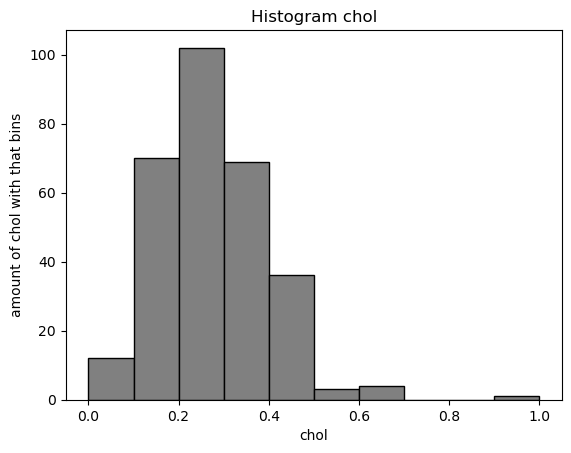

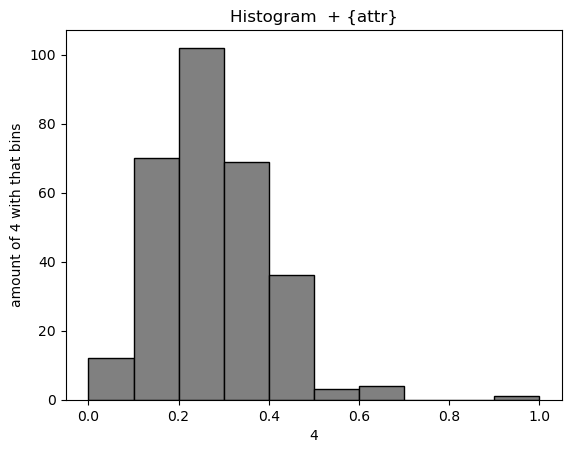

In [13]:
attr = 'chol'

plt.hist(df[attr], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], edgecolor ='black', color = 'grey')
plt.xlabel(attr)
plt.ylabel(f'amount of {attr} with that bins')
plt.title("Histogram " + attr)
plt.show()

attr = 4

plt.hist(data_np[:, attr], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], edgecolor ='black', color = 'grey')
plt.xlabel(attr)
plt.ylabel(f'amount of {attr} with that bins')
plt.title("Histogram  + {attr}")
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

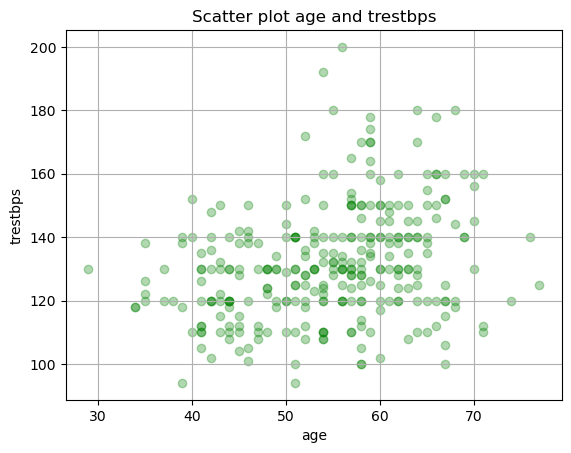

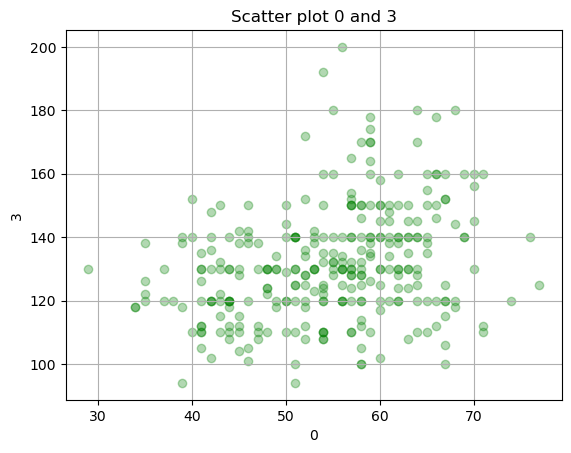

In [14]:
x = 'age'
y = 'trestbps'

plt.scatter(df[x], df[y], color = 'green', alpha=0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot {x} and {y}')
plt.grid(True)
plt.show()

x = 0
y = 3

plt.scatter(data_np[:, x], data_np[:, y], color = 'green', alpha=0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.title(f'Scatter plot {x} and {y}')
plt.grid(True)
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [15]:
x = df['age']
y = df['trestbps']

pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

print(f'Коефіцієент Пірсона: {pearson_corr}')
print(f'Коефіцієент Спірмена: {spearman_corr}')

x = data_np[:, 0]
y = data_np[:, 3]

pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

print(f'Коефіцієент Пірсона: {pearson_corr}')
print(f'Коефіцієент Спірмена: {spearman_corr}')

Коефіцієент Пірсона: 0.2904762624612976
Коефіцієент Спірмена: 0.29960965493061253
Коефіцієент Пірсона: 0.2904762624612976
Коефіцієент Спірмена: 0.29960965493061253


6. Провести One Hot Encoding категоріального string атрибуту.

In [16]:
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df[['sex']])

encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])

result_df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=False)], axis=1)

print("Encoded DataFrame: ")
print(result_df)



sex_column = data_np[:, 1].reshape(-1, 1)


encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(sex_column).toarray()

encoded_array = np.concatenate((data_np, encoded_data), axis=1)

print('Encoded Array:')
print(encoded_array)


Encoded DataFrame: 
     age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0     63    1   1       145  0.244292    1        2  0.603053      0   
1     67    1   4       160  0.365297    0        2  0.282443      1   
2     67    1   4       120  0.235160    0        2  0.442748      1   
3     37    1   3       130  0.283105    0        0  0.885496      0   
4     41    0   2       130  0.178082    0        2  0.770992      0   
..   ...  ...  ..       ...       ...  ...      ...       ...    ...   
292   57    0   4       140  0.262557    0        0  0.396947      1   
293   45    1   1       110  0.315068    0        0  0.465649      0   
294   68    1   4       144  0.152968    1        0  0.534351      0   
295   57    1   4       130  0.011416    0        0  0.335878      1   
296   57    0   2       130  0.251142    0        2  0.786260      0   

      oldpeak  slope        ca  thal  index    0    1  
0    0.370968      3  0.000000   6.0      0  0.0  1.0  
1  

7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі

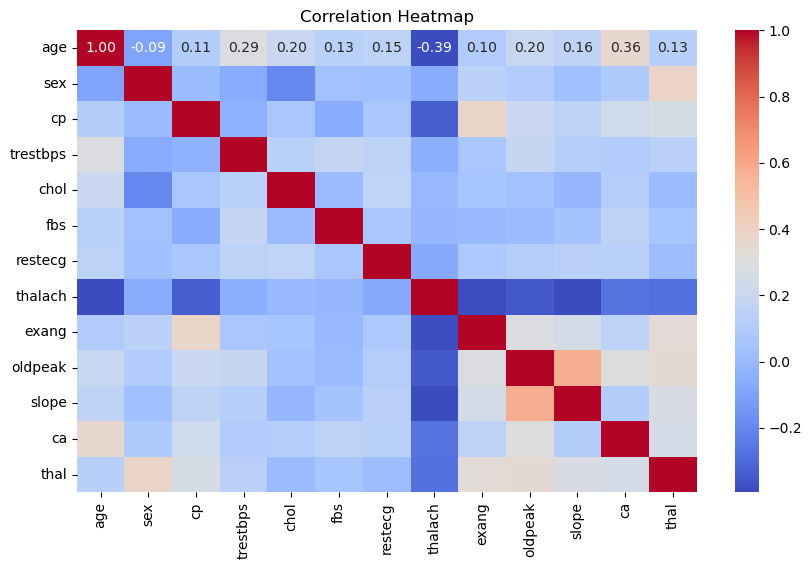

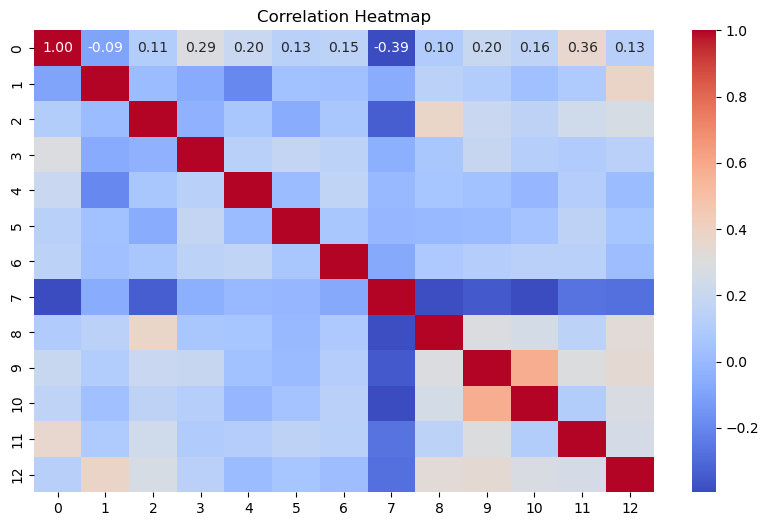

In [22]:
heatmap = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, cmap="coolwarm",fmt='.2f')
plt.title('Correlation Heatmap')
plt.show

data_np_transposed = np.transpose(data_np)
heatmap = np.corrcoef(data_np_transposed)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, cmap="coolwarm",fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()